In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [3]:
df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
df.shape

(614, 13)

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [6]:
df.Credit_History.value_counts() # also 50 are null credit history

1.0    475
0.0     89
Name: Credit_History, dtype: int64

2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

No, the range on Applicant Income is much higher than anticipated, both wealthy and poor people looking for loans. Concerning the Coapplicant, seems like they have even less money and wouldn't contribute greatly? Or perhaps they assist the poor applicants?

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

**Application Income** -- yes, few people making more money and skewing the mean higher

Loan Amount affecting Loan Status?

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

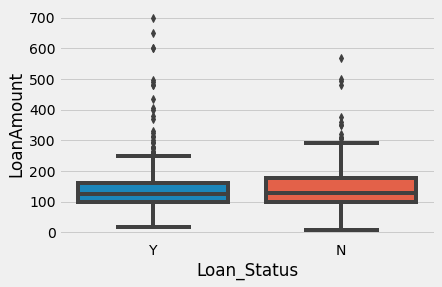

In [6]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)

Loan Term affecting Loan Status?

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

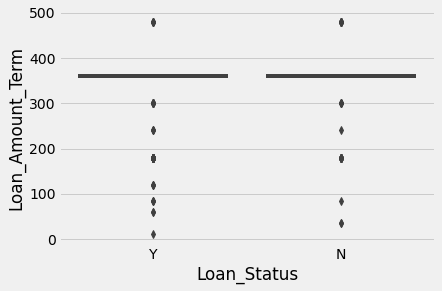

In [7]:
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=df)

Property Area affecting Loan Status?

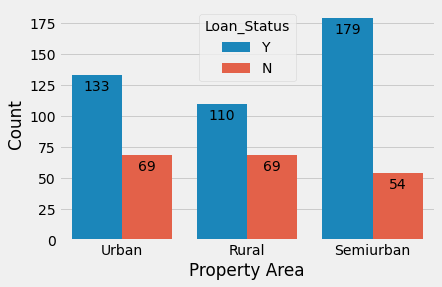

In [19]:
fig, ax = plt.subplots();
splot = sns.countplot(x='Property_Area', hue='Loan_Status', data=df, ax=ax);
ax.set_xlabel('Property Area');
ax.set_ylabel('Count');
for p in splot.patches:
    splot.annotate(format(p.get_height(), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points');
plt.savefig('PropertyArea_LoanStatus_bar.png');

In [20]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Income affecting Loan Status?

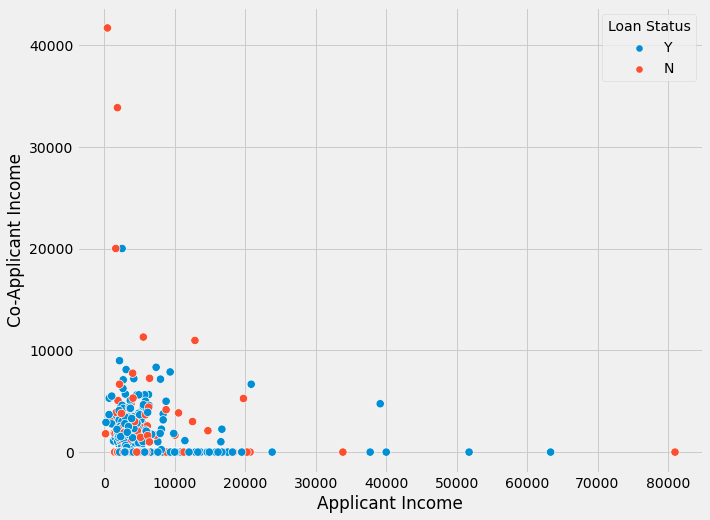

In [34]:
fig, ax=plt.subplots(figsize=(10,8));
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', hue='Loan_Status', data=df, s=70);
ax.set_xlabel('Applicant Income');
ax.set_ylabel('Co-Applicant Income');
ax.legend(title='Loan Status', fontsize = 'medium');

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [38]:
import copy
df2 = df.copy(deep=True)
df2['TotalIncome'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']

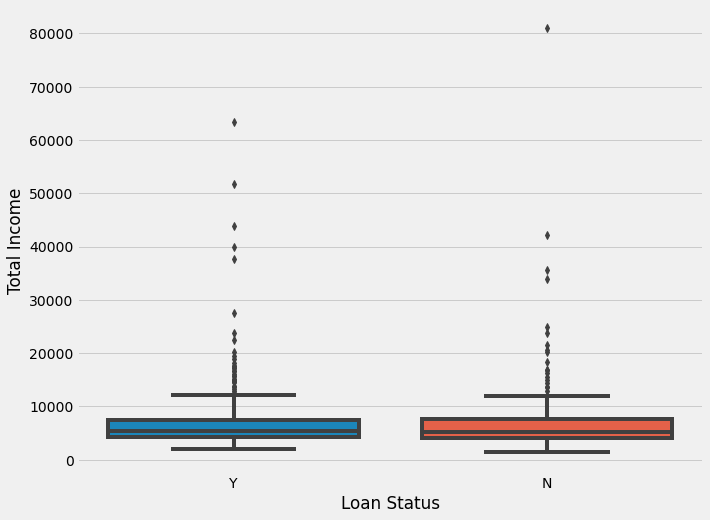

In [41]:
fig,ax=plt.subplots(figsize=(10,8));
sns.boxplot(x='Loan_Status', y='TotalIncome', data=df2);
ax.set_xlabel('Loan Status');
ax.set_ylabel('Total Income');
style.use('seaborn');

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.Gender.unique()
df.Gender.value_counts()

array(['Male', 'Female', nan], dtype=object)

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df.Married.unique()
df.Married.value_counts()

array(['No', 'Yes', nan], dtype=object)

Yes    398
No     213
Name: Married, dtype: int64

[0, 1, 2, 3+, NaN]
Categories (4, object): [0, 1, 2, 3+]
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


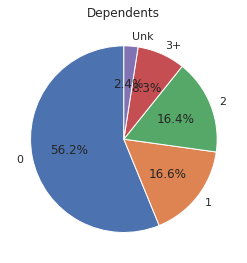

In [168]:
print(df.Dependents.unique())
print(df.Dependents.value_counts())
plt.pie([345,102,101,51,15],labels=["0","1","2","3+",'Unk'], autopct='%1.1f%%',startangle=90);
plt.title("Dependents");
sns.set(font_scale=1.0); #edited as suggested

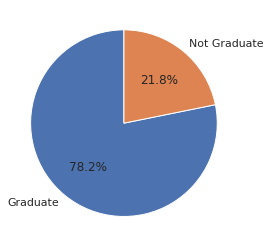

In [171]:
df.Education.unique()
df.Education.value_counts()
plt.pie([480,134],labels=['Graduate','Not Graduate'], autopct='%1.1f%%',startangle=90);
#plt.savefig('Education_pie.png')

In [192]:
loan_yes = df[df['Loan_Status']=='Y']
loan_no = df[df['Loan_Status']=='N']
edu_yes = df[df['Education']=='Graduate']
edu_no = df[df['Education']=='Not Graduate']

grad_loan = df[(df['Loan_Status']=='Y')&(df['Education']=='Graduate')]['Loan_ID'].count()
grad_noloan = df[(df['Loan_Status']=='N')&(df['Education']=='Graduate')]['Loan_ID'].count()
notgrad_loan = df[(df['Loan_Status']=='Y')&(df['Education']=='Not Graduate')]['Loan_ID'].count()
notgrad_noloan = df[(df['Loan_Status']=='N')&(df['Education']=='Not Graduate')]['Loan_ID'].count()

print('Graduate + Loan', grad_loan, '; ', round(grad_loan/(grad_loan+grad_noloan)*100,2),'% of Graduates got Loan')
print('Graduate + No Loan', grad_noloan)
print('Not Graduate + Loan', notgrad_loan,'; ', round(notgrad_loan/(notgrad_loan+notgrad_noloan)*100,2),'% of Not Graduates got Loan')

fig = axis.get_figure()

Graduate + Loan 340 ;  70.83 % of Graduates got Loan
Graduate + No Loan 140
Not Graduate + Loan 82 ;  61.19 % of Not Graduates got Loan


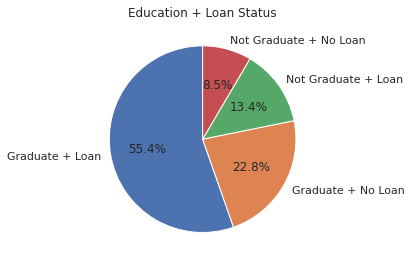

In [189]:
plt.pie([340,140,82,52],labels=["Graduate + Loan","Graduate + No Loan","Not Graduate + Loan","Not Graduate + No Loan"], autopct='%1.1f%%',startangle=90);
plt.title("Education + Loan Status");
sns.set(font_scale=1.0);

<AxesSubplot:xlabel='Education', ylabel='TotalIncome'>

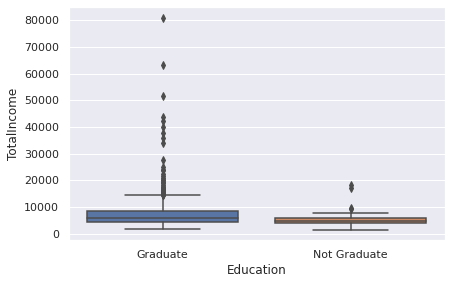

In [193]:
sns.boxplot(x='Education', y='TotalIncome', data=df2)

In [12]:
df.Self_Employed.unique()
df.Self_Employed.value_counts()

array(['No', 'Yes', nan], dtype=object)

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df.Property_Area.unique()
df.Property_Area.value_counts()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [14]:
df.Loan_Status.unique()
df.Loan_Status.value_counts()

array(['Y', 'N'], dtype=object)

Y    422
N    192
Name: Loan_Status, dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [15]:
print(f'Percentage of People with Credit History: {round(df[df.Credit_History==1].shape[0]/df.shape[0]*100,2)}%')

Percentage of People with Credit History: 77.36%


In [202]:
df.Credit_History = df.Credit_History.fillna(0)
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [203]:
filter2 = (df.Credit_History==1) & (df.Loan_Status=='Y')
print(f'Percentage of People with Loan AND Credit History: {round(df[filter2].shape[0]/df.shape[0]*100,2)}%')

Percentage of People with Loan AND Credit History: 61.56%


In [204]:
filter2 = (df.Credit_History==0) & (df.Loan_Status=='Y')
print(f'Percentage of People with Loan WITHOUT Credit History: {round(df[filter2].shape[0]/df.shape[0]*100,2)}%')

Percentage of People with Loan WITHOUT Credit History: 7.17%


In [205]:
filter2 = (df.Credit_History==0) & (df.Loan_Status=='N')
print(f'Percentage of People WITHOUT Loan WITHOUT Credit History: {round(df[filter2].shape[0]/df.shape[0]*100,2)}%')

Percentage of People WITHOUT Loan WITHOUT Credit History: 15.47%


In [206]:
filter2 = (df.Credit_History==1) & (df.Loan_Status=='N')
print(f'Percentage of People WITHOUT Loan with Credit History: {round(df[filter2].shape[0]/df.shape[0]*100,2)}%')

Percentage of People WITHOUT Loan with Credit History: 15.8%


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.

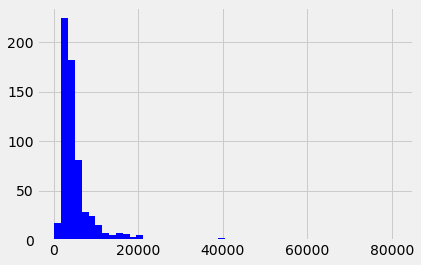

In [18]:
plt.hist(x="ApplicantIncome", data=df, bins=50, color='b');


Look at box plots to understand the distributions. 

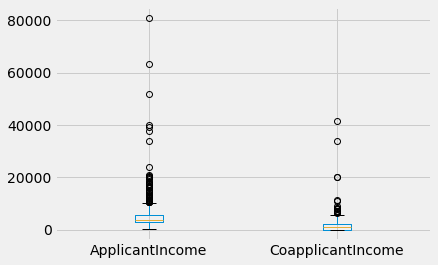

In [19]:
df[['ApplicantIncome','CoapplicantIncome']].boxplot();

Look at the distribution of income segregated  by `Education`

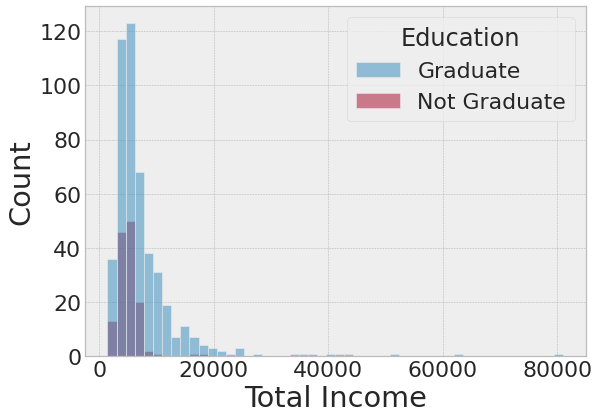

In [133]:
import copy
df2 = df.copy(deep=True)
df2['TotalIncome'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']
f, ax = plt.subplots(figsize=(8, 6));
#ax.hist(df2['TotalIncome'], 20, histtype='bar', color='b', label=df2['Education'][0]);
#ax.hist(df2['TotalIncome'], 20, histtype='bar', color='k', label=df2['Education'][1]);
#sns.color_palette("Paired");
style.use('bmh')
sns.histplot(data=df2, x='TotalIncome', hue='Education', stat='count', bins=50, legend=True, ax=ax);
ax.set_xlabel('Total Income');

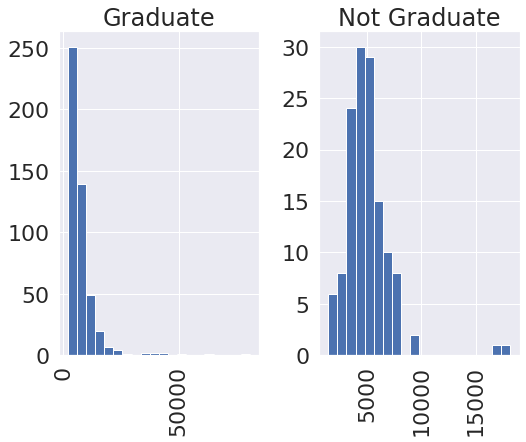

In [112]:
f, ax = plt.subplots(figsize=(8, 6));
df2.hist(column='TotalIncome', by='Education', bins=20, ax=ax);
sns.set(font_scale=2);

Look at the histogram and boxplot of LoanAmount

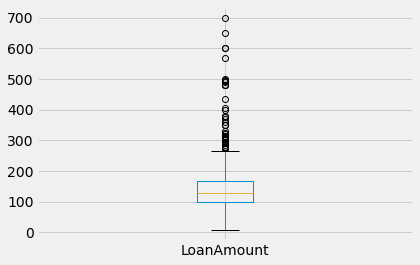

In [21]:
df.boxplot(column=['LoanAmount']);

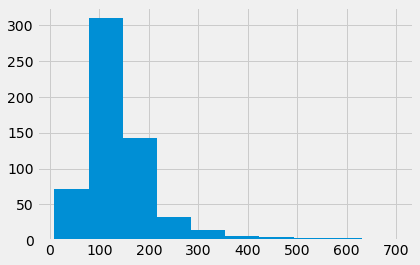

In [22]:
df.LoanAmount.hist();

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

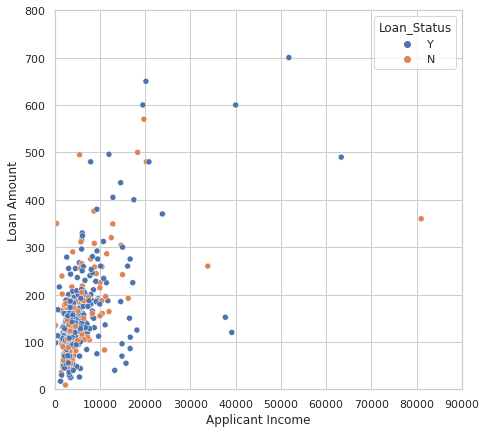

In [23]:
sns.set_theme(style="whitegrid");
f, ax = plt.subplots(figsize=(6.5, 6.5));
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, ax=ax);
ax.set_xlim(0,90000);
ax.set_ylim(0,800);
ax.set_xlabel('Applicant Income');
ax.set_ylabel('Loan Amount');

In [ ]:
sns.set_theme(style="whitegrid");
f, ax = plt.subplots(figsize=(6.5, 6.5));
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, ax=ax);
ax.set_xlim(0,90000);
ax.set_ylim(0,800);
ax.set_xlabel('Applicant Income');
ax.set_ylabel('Loan Amount');

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [24]:
#df['Loan_Amount_Term'].dropna(inplace=True)

In [25]:
#df.Married = df.Married.fillna('No')

In [26]:
#df.Gender

In [27]:
#df.dropna(inplace=True) # don't do this for future runs, but for now let's get to the modeling!

In [28]:
#df.Self_Employed.fillna('No',inplace=True)

In [29]:
#df[df.Loan_Status=='N'].LoanAmount.dropna(inplace=True)

In [30]:
#df.Credit_History.fillna(0, inplace=True)

In [31]:
df.shape

(614, 13)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

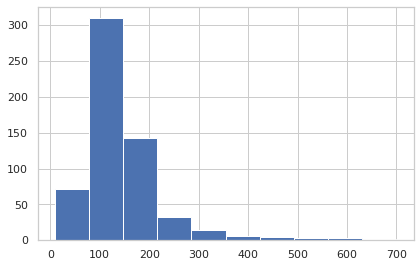

In [32]:
df.LoanAmount.hist();

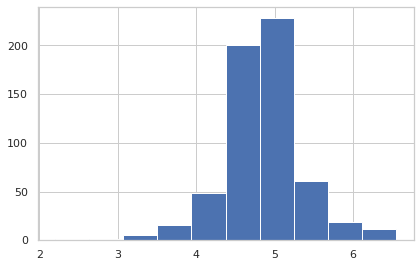

In [33]:
df.LoanAmount = df.LoanAmount.apply(np.log)
df.LoanAmount.hist();

Combine both incomes as total income and take a log transformation of the same.

In [34]:
#df['TotalIncome'] = df.ApplicantIncome + df.CoapplicantIncome
#df.TotalIncome = df.TotalIncome.apply(np.log)
#df.head()

In [35]:
df.shape
df.info()

(614, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 4. Building a Predictive Model

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

# reload dataframe to start from here when restarting kernel
df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Split features based on categorical or numerical basis for different processing in pipeline

In [2]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

Transform object columns into category columns

In [3]:
for col in cat_feats:
    df[col] = df[col].astype('category')
    
cat_feats.remove('Loan_Status') # since this will not be a feature
cat_feats.remove("Loan_ID") # since this is not needed for the model

Determine X and y, split into Test and Train sets

In [4]:
X = df.drop(columns=['Loan_Status','Loan_ID'])
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Build Pipelines

In [5]:
from sklearn.pipeline import Pipeline, FeatureUnion
# numerical preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
# categorical preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
# models?
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings('ignore')

In [6]:
# create new column given df
def totalIncome(dataset):
    dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
    return dataset

# allow function transformation on df column
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

# log transform given columns
def LogTransform(dataset):
    dataset = dataset.assign(log_TotalIncome = np.log1p(dataset['TotalIncome']))
    dataset = dataset.assign(log_LoanAmount = np.log1p(dataset['LoanAmount']))
    dataset = dataset.drop(columns=['TotalIncome','LoanAmount'])
#    dataset['TotalIncome'].assign() = dataset['TotalIncome'].apply(np.log)
#    dataset['LoanAmount'] = dataset['LoanAmount'].apply(np.log)
    return dataset

# don't forget ToDenseTransformer after one hot encoder
class ToDenseTransformer():
    # here you define the operation it should perform
    def transform(self, X, y=None, **fit_params):
        return X.todense()
    # just return self
    def fit(self, X, y=None, **fit_params):
        return self

# select specific columns to perform pipeline onto
class SelectColumnsTransformer():
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X, **transform_params):
        cpy_df = X[self.columns].copy()
        return cpy_df

    def fit(self, X, y=None, **fit_params):
        return self

Pre-processing Pipelines

In [7]:
# NUMERICAL --> select k best columns to be tuned later
## different columns need different NaN treatments
nullnumTransform = ColumnTransformer([
    ('impute_zero', SimpleImputer(strategy='constant', fill_value=0), ['Credit_History','log_LoanAmount']), # if empty, assume not-applicable = 'No'
    ('impute_mean', SimpleImputer(strategy='mean'), ['Loan_Amount_Term'])], remainder='passthrough') # assume average loan information if not given
## scale other columns; do not need treatment for 0/1 columns like Credit_History
scalerTransform = ColumnTransformer([('std_scaler', StandardScaler(), [0,1,2])], remainder='passthrough')
## put numerical pre-processing together
numerical = Pipeline([
    ('totalincome', DataframeFunctionTransformer(totalIncome)),
    ('logtransform', DataframeFunctionTransformer(LogTransform)),
    ('selector', SelectColumnsTransformer(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History','log_TotalIncome','log_LoanAmount'])),
    ('null_fill', nullnumTransform),
    ('standard_scaler', scalerTransform),
    ('kbest', SelectKBest(k=3))])

# CATEGORICAL --> PCA 3 components to be tuned later
## different columns need different NaN treatments
nullcatTransform = ColumnTransformer([
    ('impute_no', SimpleImputer(strategy='constant', fill_value='No'), ['Married','Self_Employed']), # if empty, assume not-applicable = 'No'
    ('impute_zero', SimpleImputer(strategy='constant', fill_value='0'), ['Dependents']), # needs to be string of numbers: '0', '1', '2' or '3+'
    ('impute_mode', SimpleImputer(strategy='most_frequent'), ['Gender'])], remainder='passthrough') # no way to otherwise tell, give most common gender back
## put categorical pre-processing together
categorical = Pipeline([
    ('selector', SelectColumnsTransformer(cat_feats)),
    ('null_fill', nullcatTransform),
    ('encode', OneHotEncoder()),
    ('to_dense',ToDenseTransformer()),
    ('pca', PCA(n_components=3))])

# define which transformer applies to which columns
preprocess = FeatureUnion([
    ('categorical', categorical),
    ('numerical', numerical)])

In [8]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression())])

In [136]:
from sklearn import set_config
set_config(display='diagram')
pipeline.fit(X_train, y_train)
print("model score: %.2f%%" % (pipeline.score(X_test, y_test)*100))

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('categorical',
                                                 Pipeline(steps=[('selector',
                                                                  <__main__.SelectColumnsTransformer object at 0x7f53b99d8090>),
                                                                 ('null_fill',
                                                                  ColumnTransformer(remainder='passthrough',
                                                                                    transformers=[('impute_no',
                                                                                                   SimpleImputer(fill_value='No',
                                                                                                                 strategy='constant'),
                                                                                                   ['Married',
                                                                                                    'Self_Employed']),
                                                                                                  ('impute_zero',
                                                                                                   SimpleImpu...
                                                                                    transformers=[('impute_zero',
                                                                                                   SimpleImputer(fill_value=0,
                                                                                                                 strategy='constant'),
                                                                                                   ['Credit_History',
                                                                                                    'log_LoanAmount']),
                                                                                                  ('impute_mean',
                                                                                                   SimpleImputer(),
                                                                                                   ['Loan_Amount_Term'])])),
                                                                 ('standard_scaler',
                                                                  ColumnTransformer(remainder='passthrough',
                                                                                    transformers=[('std_scaler',
                                                                                                   StandardScaler(),
                                                                                                   [0,
                                                                                                    1,
                                                                                                    2])])),
                                                                 ('kbest',
                                                                  SelectKBest(k=3))]))])),
                ('model', LogisticRegression())])

model score: 79.67%


In [138]:
from sklearn.utils import estimator_html_repr

with open('model_pipeline.html', 'w') as f:  
    f.write(estimator_html_repr(pipeline))

23529

Try paramater grid search to improve the results

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
import time

Other Models than LR?

In [16]:
%%time
# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'preprocess__numerical__kbest__k': [1, 3, 5], 
              'preprocess__categorical__pca__n_components': [1, 3, 5],
              'model': [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), CategoricalNB(), XGBClassifier()]}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

[15:38:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

Log Reg is best, can we fine tune within LR?

In [29]:
%%time
# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'preprocess__numerical__kbest__k': [1, 2, 3], 
              'preprocess__categorical__pca__n_components': [1, 2, 3, 4],
              'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'model__penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'model__C': [100, 10, 1.0, 0.1, 0.01]}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.8048780487804879
Achieved with hyperparameters: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'preprocess__categorical__pca__n_components': 3, 'preprocess__numerical__kbest__k': 1}
CPU times: user 21min 56s, sys: 22 s, total: 22min 18s
Wall time: 5min 36s


Alright let's take hold of this best model parameters!

In [46]:
import pickle
filename = 'xtrain_logregmodel.sav'
#pickle.dump(best_model, open(filename, 'wb'))

In [47]:
loaded_model = pickle.load(open(filename, 'rb'))

In [49]:
# saving the columns
#model_columns = list(X.columns)
#with open('model_columns.pkl','wb') as file:
#    pickle.dump(model_columns, file)

In [48]:
y_pred = loaded_model.predict(X_test)
y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
result = loaded_model.score(X_test, y_test)
print(result)

0.8048780487804879


Accuracy:  80.49 %
AUC Score:  78.5 %
Confusion Matrix:


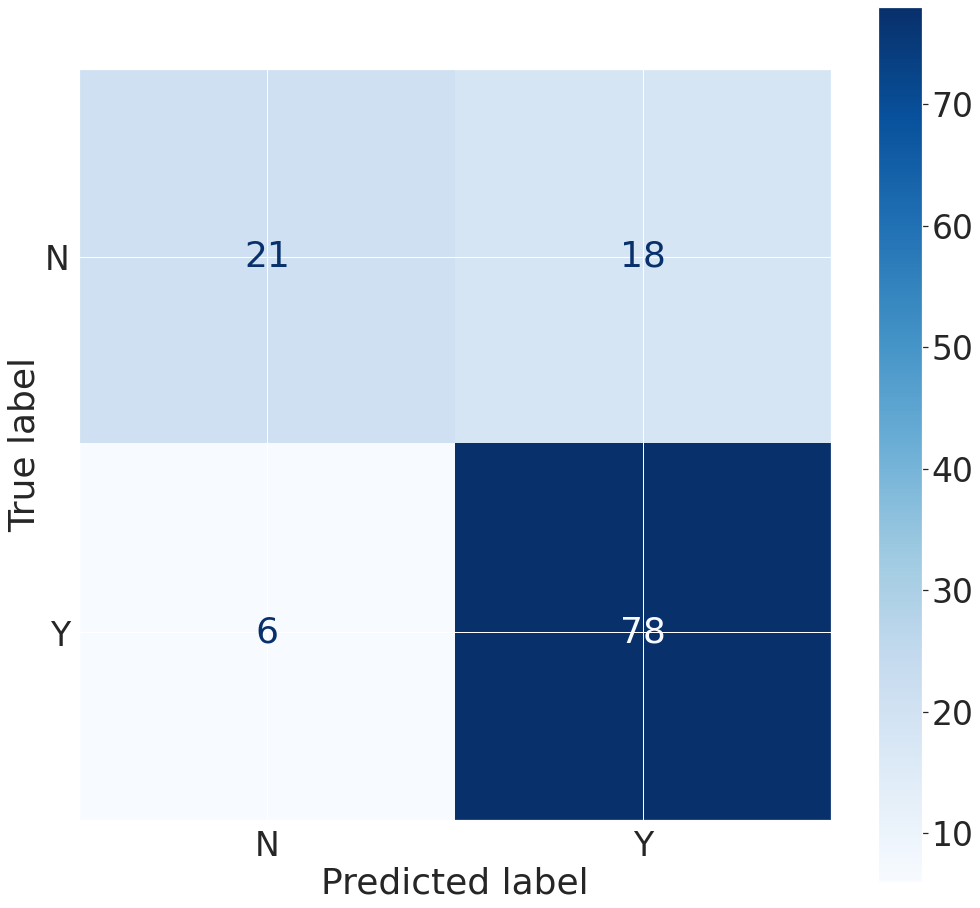

In [89]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix
print('Accuracy: ', round(accuracy_score(y_test, y_pred)*100,2),'%')
print('AUC Score: ', round(roc_auc_score(y_test, y_pred_proba)*100,2),'%')
fig, ax = plt.subplots(figsize=(15, 15));
print('Confusion Matrix:');
cm = plot_confusion_matrix(loaded_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax);
sns.set(font_scale=3.0); #edited as suggested
#plt.savefig('confusion_matrix.png');

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [17]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [43]:
json_data = {
 'Gender': 'Female',
 'Married': 'No',
 'Dependents': '1',
 'Education': 'Graduate',
 'Self_Employed': 'Yes',
 'ApplicantIncome': 25849,
 'CoapplicantIncome': 0.0,
 'LoanAmount': 300.0,
 'Loan_Amount_Term': 24.0,
 'Credit_History': 1.0,
 'Property_Area': 'Urban'
            }

In [161]:
query = [{
        "Loan_ID": "LP001001",
        "Gender": "Male",
        "Married": "No",
        "Dependents": "3+",
        "Education": "Not Graduate",
        "Self_Employed": "No",
        "ApplicantIncome": 5849,
        "CoapplicantIncome": 0.0,
        "LoanAmount": 300.0,
        "Loan_Amount_Term": 24.0,
        "Credit_History": 1.0,
        "Property_Area": "Rural"}]

In [162]:
import requests
URL = "http://ec2-18-189-186-127.us-east-2.compute.amazonaws.com:5555/predict"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [163]:
print(r.json())

{'loan status': "['Y']"}
